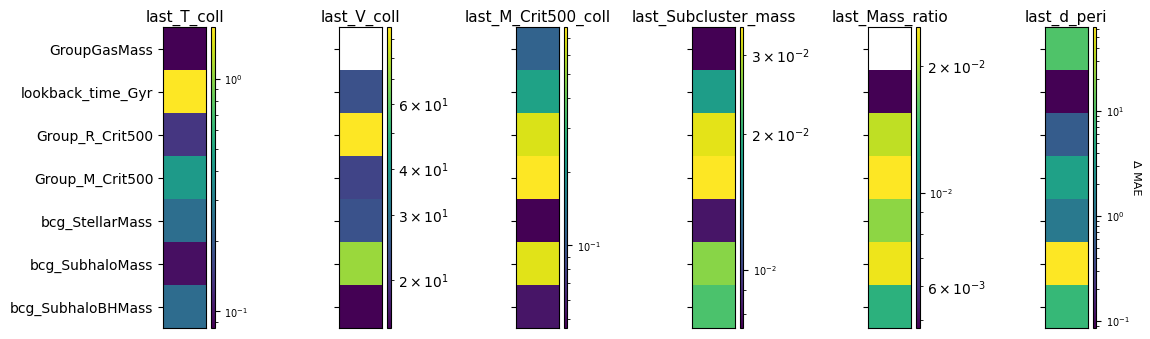

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

# 1) Load the sensitivity matrix
sensitivity_df = pd.read_csv('processed_data/sensitivity_matrix.csv', index_col=0)

# 2) Data & labels
heatmap_data   = sensitivity_df.values         # (n_targets, n_features)
target_labels  = sensitivity_df.index.tolist()
feature_labels = sensitivity_df.columns.tolist()

n_rows, n_cols = heatmap_data.shape

# 3) Create subplots: one column per feature
fig, axes = plt.subplots(
    1, n_cols,
    figsize=(n_cols * 2.0, n_rows * 0.5),
    squeeze=False
)

for j, ax in enumerate(axes[0]):
    col = heatmap_data[:, j][:, None]

    positive = col[col > 0]
    vmin = positive.min() if positive.size else 1e-3
    vmax = col.max()

    im = ax.imshow(
        col,
        aspect='equal',
        origin='lower',
        norm=LogNorm(vmin=vmin, vmax=vmax),
        cmap='viridis'
    )

    ax.set_yticks(np.arange(n_rows))
    if j == 0:
        ax.set_yticklabels(target_labels, fontsize=10)
    else:
        ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_title(feature_labels[j], pad=4, fontsize=11)

    # add a colorbar to every panel
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="8%", pad=0.05)
    cbar = plt.colorbar(im, cax=cax, orientation='vertical')
    cbar.ax.tick_params(labelsize=7)

    # only label the very last one
    if j == n_cols - 1:
        cbar.set_label('Δ MAE', rotation=270, labelpad=8, fontsize=8)
    else:
        cbar.set_label('')  # hide label on other bars

# tighten spacing
fig.subplots_adjust(wspace=0.15, hspace=0)
plt.tight_layout()
plt.savefig('5.sensitivity_analysis.png', dpi=300, bbox_inches='tight')
#plt.savefig('sensitivity_analysis.pdf', bbox_inches='tight')
plt.show()
